In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [8]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df = df.drop(['area_type','availability','society','balcony'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [12]:
df['bath'].mean()

2.6926096474673513

In [13]:
df['bath'].median()

2.0

In [14]:
df.bath.fillna(df['bath'].median(),inplace=True)

In [15]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [16]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [17]:
df.replace({'size':{'4 Bedroom':'4 BHK'}})

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 BHK,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [18]:
df.replace({'size':{'4 Bedroom':'4 BHK','3 Bedroom':'3 BHK','2 Bedroom':'2 BHK','5 Bedroom':'5 BHK','6 Bedroom':'6 BHK','1 Bedroom':'1 BHK','8 Bedroom':'8 BHK','7 Bedroom':'7 BHK','9 Bedroom':'9 BHK','10 Bedroom':'10 BHK','11 Bedroom':'11 BHK','12 Bedroom':'12 BHK','43 Bedroom':'43 BHK','18 Bedroom':'18 BHK'}},inplace=True)

In [19]:
df['size'].value_counts()

2 BHK     5528
3 BHK     4857
4 BHK     1417
1 BHK      643
5 BHK      356
6 BHK      221
7 BHK      100
8 BHK       89
9 BHK       54
10 BHK      14
1 RK        13
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: size, dtype: int64

In [20]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [21]:
df['total_sqft'].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
df['bhk'] = df['size'].apply(lambda x: x.split(' ')[0])

In [25]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 BHK,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df['bhk'] = df['bhk'].astype(int)
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 BHK,2400,40.0,660.0,43


In [27]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
def not_valid_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
df[~df['total_sqft'].apply(not_valid_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 BHK,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 BHK,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [30]:
def convert_range_sqft_to_num(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
convert_range_sqft_to_num('2250')

2250.0

In [32]:
convert_range_sqft_to_num('10 - 20')

15.0

In [33]:
new_df = df.copy()
new_df['total_sqft'] = new_df['total_sqft'].apply(convert_range_sqft_to_num)
new_df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [34]:
new_df.loc[56]

location      Devanahalli
size                4 BHK
total_sqft         3210.0
bath                  2.0
price               192.0
bhk                     4
Name: 56, dtype: object

In [35]:
new_df.loc[410].total_sqft

nan

In [36]:
new_df.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [37]:
new_df['total_sqft'].isna().sum()

46

In [38]:
new_df['total_sqft'].mean()

1558.8091751527493

In [39]:
new_df['total_sqft'].median()

1275.0

In [40]:
new_df[405:415]

,location,size,total_sqft,bath,price,bhk
405,Kamakshipalya,2 BHK,1000.0,2.0,165.0,2
406,Bannerghatta Road,4 BHK,1200.0,2.0,125.0,4
407,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3
408,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7
409,Sultan Palaya,2 BHK,550.0,1.0,62.0,2
410,Kengeri,1 BHK,NaN,1.0,18.5,1
411,Sanne Amanikere,2 BHK,1185.0,2.0,38.0,2
412,Kengeri,2 BHK,750.0,2.0,38.0,2
413,Mahalakshmi Layout,6 BHK,1200.0,7.0,250.0,6
414,Kanakpura Road,3 BHK,1550.0,3.0,64.5,3


In [41]:
new_df[new_df.bhk ==1].head(10)

,location,size,total_sqft,bath,price,bhk
20,Kengeri,1 BHK,600.0,1.0,15.00,1
24,Thanisandra,1 RK,510.0,1.0,25.25,1
42,Ganga Nagar,1 BHK,600.0,1.0,38.00,1
43,Yelahanka,1 BHK,660.0,1.0,48.00,1
171,Attibele,1 BHK,450.0,1.0,11.00,1
177,Nagavara,1 BHK,400.0,1.0,14.00,1
178,Malleshwaram,1 BHK,705.0,1.0,67.00,1
217,Electronic City,1 BHK,589.0,1.0,27.00,1
240,Chandapura,1 BHK,645.0,1.0,16.45,1
242,Chandapura,1 BHK,645.0,1.0,16.45,1


In [42]:
new_df[new_df.bhk==1].total_sqft.mean()

750.9161205564142

In [43]:
new_df[new_df.bhk==1].total_sqft.median()

645.0

In [44]:
mode_1_bhk = new_df[new_df.bhk==1].total_sqft.mode()
mode_1_bhk

0    600.0
Name: total_sqft, dtype: float64

In [45]:
new_df.total_sqft.isna().sum()

46

In [46]:
new_df.dropna(inplace=True)

In [47]:
new_df.total_sqft.isna().sum()

0

In [48]:
new_df[405:415]

,location,size,total_sqft,bath,price,bhk
405,Kamakshipalya,2 BHK,1000.0,2.0,165.0,2
406,Bannerghatta Road,4 BHK,1200.0,2.0,125.0,4
407,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3
408,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7
409,Sultan Palaya,2 BHK,550.0,1.0,62.0,2
411,Sanne Amanikere,2 BHK,1185.0,2.0,38.0,2
412,Kengeri,2 BHK,750.0,2.0,38.0,2
413,Mahalakshmi Layout,6 BHK,1200.0,7.0,250.0,6
414,Kanakpura Road,3 BHK,1550.0,3.0,64.5,3
415,Amco Colony,3 BHK,1760.0,3.0,88.0,3


In [49]:
new_df['price_per_sqft'] = new_df['price']*100000/new_df['total_sqft']
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [50]:
new_df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [51]:
len(new_df.location.unique())

1298

In [52]:
new_df.location = new_df.location.apply(lambda x:x.strip())
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [53]:
location_count = new_df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_count

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [54]:
location_count[location_count<=10]

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [55]:
location_count[location_count<=15]

location
Judicial Layout          15
Nagavarapalya            15
Benson Town              15
Kodihalli                15
Varthur Road             15
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1107, dtype: int64

In [56]:
location_count[location_count<=20]

location
Yelachenahalli           20
HBR Layout               20
Sanjay nagar             20
Poorna Pragna Layout     20
Kalyan nagar             19
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1143, dtype: int64

In [57]:
location_less_than_10_count = location_count[location_count<=10]
location_less_than_10_count

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [58]:
len(new_df.location.unique())

1287

In [59]:
new_df.location = new_df.location.apply(lambda x: 'Other location' if x in location_less_than_10_count else x)

In [60]:
len(new_df.location.unique())

241

In [61]:
new_df[new_df.total_sqft/new_df.bhk<=300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other location,6 BHK,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 BHK,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 BHK,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 BHK,1350.0,7.0,85.0,8,6296.296296
70,Other location,3 BHK,500.0,3.0,100.0,3,20000.000000


In [62]:
len(new_df[new_df.total_sqft/new_df.bhk<=300])

926

In [63]:
new_df = new_df[~(new_df.total_sqft/new_df.bhk<=300)]
new_df.shape

(12331, 7)

In [64]:
new_df.price_per_sqft.describe()

count     12331.000000
mean       6211.250024
std        4046.224800
min         267.829813
25%        4200.000000
50%        5268.199234
75%        6827.794562
max      176470.588235
Name: price_per_sqft, dtype: float64

In [65]:
new_df.price.mean()

110.84062403697978

In [66]:
# remove price per sqft that is beyond the 1st standard deviation.
# Anything above "mean-standard" deviation & below "mean+standrad" deviation 

def remove_price_per_sqft_outliers(dataframe):
    output_dataframe = pd.DataFrame()
    for key, sub_dataframe in dataframe.groupby('location'):
        mean = np.mean(sub_dataframe.price_per_sqft)
        std_dev = np.std(sub_dataframe.price_per_sqft)
        filtered_dataframe = sub_dataframe[(sub_dataframe.price_per_sqft>(mean-std_dev)) & (sub_dataframe.price_per_sqft<=(mean+std_dev))]
        output_dataframe = pd.concat([output_dataframe,filtered_dataframe],ignore_index=True)
    return output_dataframe
new_df = remove_price_per_sqft_outliers(new_df)
new_df.shape

(10067, 7)

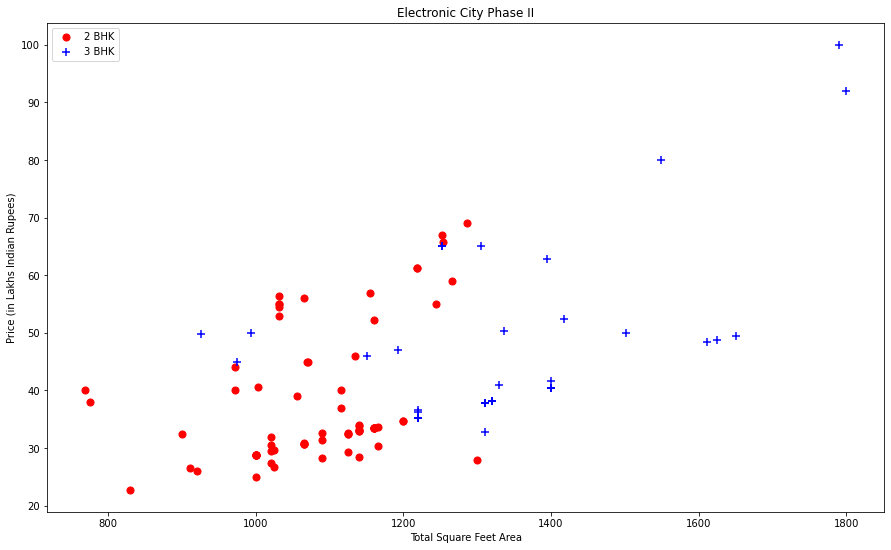

In [83]:
def scatter_plot_chart(dataframe,location):
    bhk_2 = dataframe[(dataframe.location==location) & (dataframe.bhk==2)]
    bhk_3 = dataframe[(dataframe.location==location) & (dataframe.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,9)
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color='red',label='2 BHK', s=50)
    plt.scatter(bhk_3.total_sqft,bhk_3.price,marker='+', color='blue',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in Lakhs Indian Rupees)")
    plt.title(location)
    plt.legend()
    
scatter_plot_chart(new_df,"Electronic City Phase II")

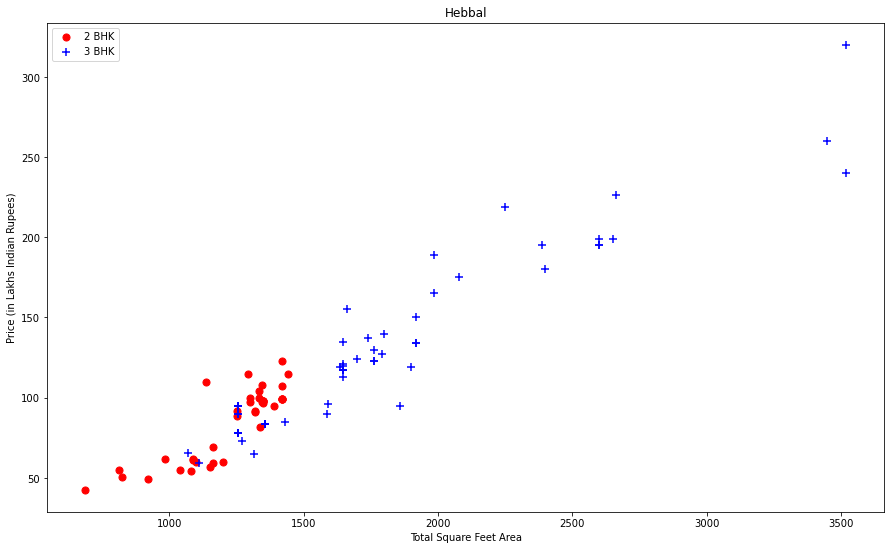

In [84]:
scatter_plot_chart(new_df,"Hebbal")

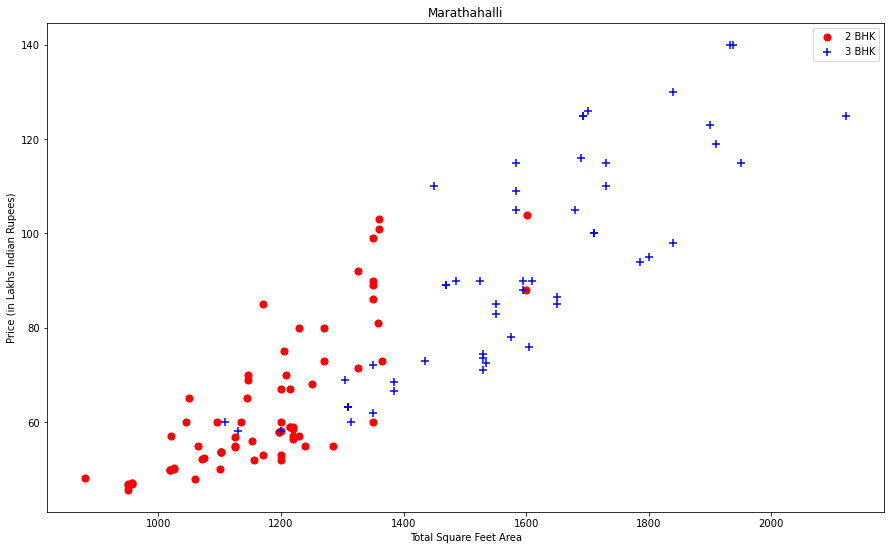

In [85]:
scatter_plot_chart(new_df,"Marathahalli")

In [89]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },
}


def remove_bhk_price_outliers(dataframe):
    exclude_indices = np.array([])
    for location, location_df in dataframe.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dataframe.drop(exclude_indices,axis='index')

new_df = remove_bhk_price_outliers(new_df)
new_df.shape

(7184, 7)

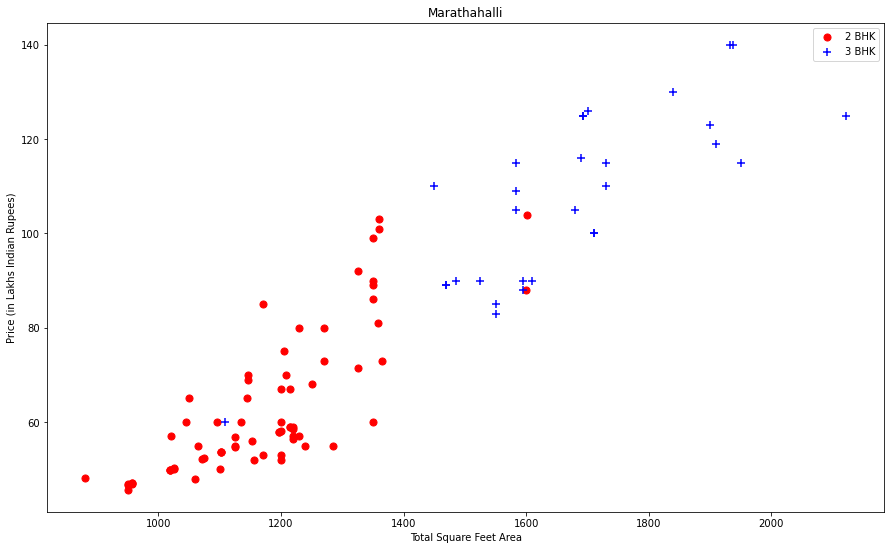

In [90]:
scatter_plot_chart(new_df,"Marathahalli")

Text(0, 0.5, 'Count')

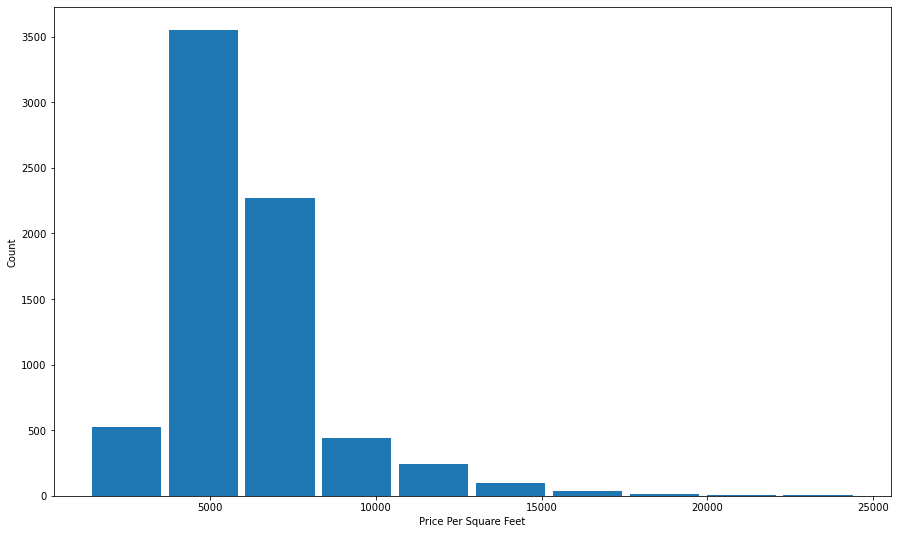

In [97]:
plt.hist(new_df.price_per_sqft,rwidth=0.9)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [98]:
new_df.bath.value_counts()

2.0     4149
3.0     1731
1.0      552
4.0      472
5.0      170
6.0       74
7.0       15
8.0       11
9.0        5
12.0       3
16.0       1
13.0       1
Name: bath, dtype: int64

In [99]:
new_df.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [101]:
new_df[new_df.bath>=9]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3677,KR Puram,9 BHK,4600.0,9.0,200.0,9,4347.826087
5008,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000
5171,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5357,Other location,11 BHK,5000.0,9.0,360.0,11,7200.000000
5735,Other location,6 BHK,11338.0,9.0,1000.0,6,8819.897689
5810,Other location,10 BHK,12000.0,12.0,525.0,10,4375.000000
5895,Other location,16 BHK,10000.0,16.0,550.0,16,5500.000000
6076,Other location,9 BHK,4500.0,9.0,500.0,9,11111.111111
6610,Other location,11 BHK,6000.0,12.0,150.0,11,2500.000000
6935,Other location,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [102]:
new_df[new_df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5171,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5810,Other location,10 BHK,12000.0,12.0,525.0,10,4375.000000
5895,Other location,16 BHK,10000.0,16.0,550.0,16,5500.000000
6610,Other location,11 BHK,6000.0,12.0,150.0,11,2500.000000
6935,Other location,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

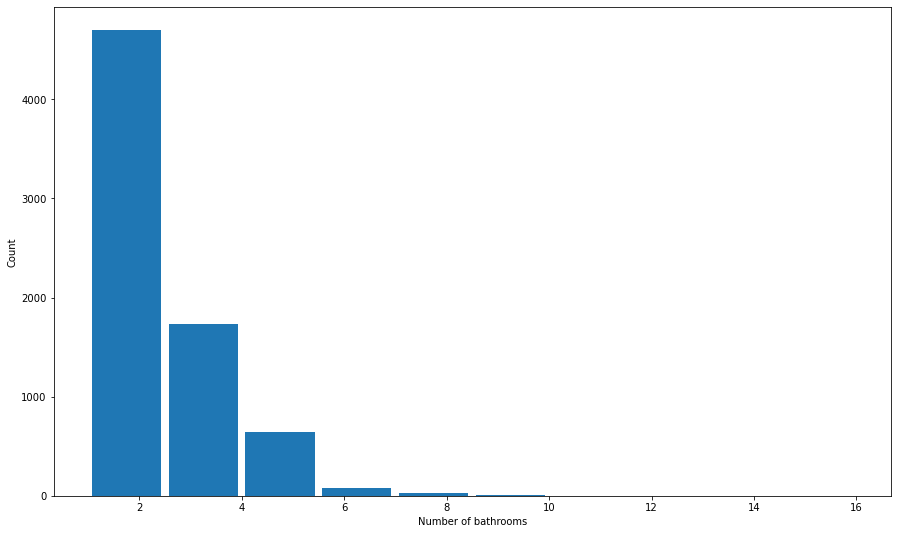

In [103]:
plt.hist(new_df.bath,rwidth=0.9)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [108]:
new_df[new_df.bath>new_df.bhk+1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
34,2nd Stage Nagarbhavi,6 BHK,3000.0,8.0,451.0,6,15033.333333
508,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.852399
558,BTM 2nd Stage,3 BHK,1260.0,5.0,185.0,3,14682.539683
785,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.132802
1041,Begur Road,4 BHK,2464.5,6.0,118.0,4,4787.989450
...,...,...,...,...,...,...,...
9234,Vijayanagar,4 BHK,2100.0,6.0,252.0,4,12000.000000
9390,Whitefield,3 BHK,3850.0,5.0,316.0,3,8207.792208
9455,Whitefield,3 BHK,2700.0,5.0,175.0,3,6481.481481
9550,Whitefield,4 BHK,4003.0,6.0,300.0,4,7494.379216


In [109]:
new_df[new_df.bath>new_df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1572,Chikkabanavar,4 BHK,2460.0,7.0,80.0,4,3252.032520
5132,Nagasandra,4 BHK,7000.0,8.0,450.0,4,6428.571429
5735,Other location,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8855,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [110]:
new_df.shape

(7184, 7)

In [111]:
new_df = new_df[new_df.bath<new_df.bhk+2]
new_df.shape

(7109, 7)

In [113]:
new_df = new_df.drop(['size','price_per_sqft'],axis=1)
new_df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [115]:
dummy = pd.get_dummies(new_df.location)
dummy

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
new_df = pd.concat([new_df,dummy.drop(['Other location'],axis=1)],axis=1)
new_df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
new_df.drop(['location'],axis=1,inplace=True)
new_df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model building

In [121]:
X = new_df.drop(['price'],axis=1)
y = new_df['price']
X.shape,y.shape

((7109, 243), (7109,))

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=18)

In [140]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.8824082612956896

In [141]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

split = ShuffleSplit(n_splits=5,train_size=0.75,random_state=18)
cross_val_score(LR, X, y, cv=split)

array([0.88240826, 0.8306011 , 0.8600059 , 0.87088998, 0.82627815])

In [142]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

In [143]:
cross_val_score(SVR(), X, y, cv=split)

array([0.42532891, 0.63645539, 0.56324885, 0.4747845 , 0.65038601])

In [144]:
cross_val_score(RandomForestRegressor(), X, y, cv=split)

array([0.86866895, 0.75103472, 0.83530472, 0.85531939, 0.80171807])

In [145]:
cross_val_score(DecisionTreeRegressor(), X, y, cv=split)

array([0.83190965, 0.51352206, 0.78320897, 0.81712092, 0.69820827])

In [146]:
cross_val_score(KNeighborsRegressor(), X, y, cv=split)

array([0.67554999, 0.68170619, 0.68546181, 0.67759558, 0.65543027])

In [147]:
cross_val_score(Lasso(), X, y, cv=split)

array([0.75370436, 0.68932535, 0.67765646, 0.73549813, 0.69577803])

In [148]:
from sklearn.model_selection import GridSearchCV


def model_performance_using_gridsearchcv(X,y):
    model_params = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'criterion' : ["squared_error", "absolute_error", "poisson"],
                'n_estimators' : [50,100,150]
            }
        }
    }
    score = []
    splits = ShuffleSplit(n_splits=5, train_size=0.75, random_state=18)
    for model_name, mp in model_params.items():
        gs =  GridSearchCV(mp['model'], mp['params'], cv=splits, return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(score,columns=['model','best_score','best_params'])

model_performance_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.854037,{'normalize': True}
1,lasso,0.710392,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.742767,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.822088,"{'criterion': 'squared_error', 'n_estimators':..."


In [166]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

In [167]:
def price_pediction(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return LR.predict([x])[0]

In [168]:
price_pediction('Rajaji Nagar',1000,2,2)

219.31964270025298

In [169]:
price_pediction('1st Phase JP Nagar',1000,2,2)

90.3237123285421

In [170]:
price_pediction('1st Phase JP Nagar',1000,3,3)

89.90665120678062

In [171]:
price_pediction('Hebbal',1000,2,2)

71.18043370764958

In [172]:
price_pediction('Indira Nagar',1000,2,2)

176.16355082255018

In [173]:
price_pediction('Whitefield',1000,2,2)

52.652586634435465

# Export model

In [174]:
import pickle
with open('home_price_prediction_model.pickle','wb') as f:
    pickle.dump(LR,f)

In [175]:
import json
columns = {
    'data_columns' : [column.lower() for column in X.columns]
}
with open("columns_of_prediction_model.json","w") as f:
    f.write(json.dumps(columns))